In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_df_features_new = pd.read_csv('Data/model_df_features_new.csv')

In [3]:
model_df_features_new.drop(columns=['split','subset','top_genre_number','genres_all'], inplace=True)

In [4]:
counts = model_df_features_new['genre_top'].value_counts()
mask = model_df_features_new['genre_top'].isin(counts[counts >= 1000].index)
filtered_df = model_df_features_new[mask]

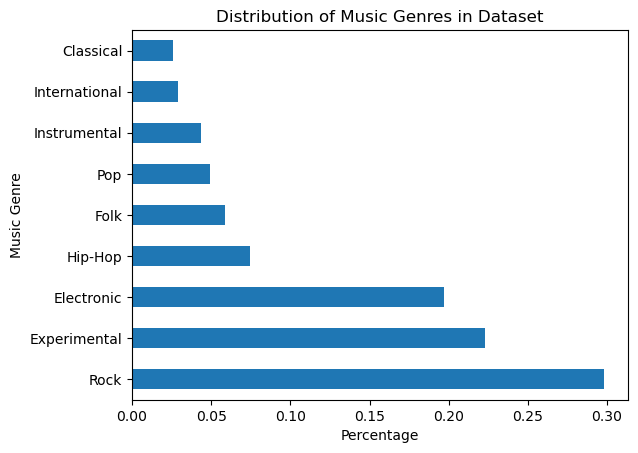

In [5]:
import matplotlib.image as mpimg

plt.figure()

filtered_df['genre_top'].value_counts(normalize=True).plot(kind='barh')
plt.xlabel('Percentage')
plt.ylabel('Music Genre')
plt.title('Distribution of Music Genres in Dataset')



plt.savefig('my_plot.png', bbox_inches='tight')

plt.show()

In [6]:
filtered_df['genre_top'].value_counts()

Rock             14184
Experimental     10608
Electronic        9372
Hip-Hop           3552
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Name: genre_top, dtype: int64

# Baseline

In [ ]:
filtered_df['genre_top'].value_counts(normalize=True)

In [ ]:
probabilities = (filtered_df['genre_top'].value_counts(normalize=True)).to_dict()
probabilities

In [ ]:
import collections
import random 

def baseline(y,randomstate):
    genres = list(set(y)) # label encoded genres
    probabilities = np.bincount(y)/y.shape[0] #probabilties of each genre
    random.seed(randomstate) #random state
    y_pred = random.choices(genres, weights=probabilities,k=y.shape[0]) #an array of size y, with the weights being the prob
    class_report = classification_report(y_test,y_pred)
    return print(class_report)

In [ ]:


baseline(y_test,42)

In [ ]:
genres = list(set(y_encoded))
genres 

In [ ]:
import collections
y_encoded
collections.Counter(y_encoded)[4]/y.shape[0]


unique_numbers = list(set(y_encoded))
probabilities = np.bincount(y_encoded)/y_encoded.shape[0]

In [ ]:
np.random.multinomial(y_encoded.shape[0], probabilities, size=5)

In [7]:
X = filtered_df.drop(columns='genre_top')


y = filtered_df['genre_top']

y.shape

(47549,)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder object
label_encoder = LabelEncoder()

# Fit the encoder on target
label_encoder.fit(y)

# Transform the target 
y_encoded = label_encoder.transform(y)

y_encoded.shape

(47549,)

In [10]:

class_df = pd.DataFrame({'class_label': label_encoder.classes_, 'encoded_value': range(len(label_encoder.classes_))})
class_df.set_index('encoded_value', inplace=True)

y_encoded_df = pd.DataFrame({'y_encoded': y_encoded})
y_encoded_df.drop_duplicates(inplace=True)

class_table = y_encoded_df.merge(class_df, how='left', left_on='y_encoded', right_index=True)
class_table = class_table.set_index('y_encoded').sort_index(ascending=True)

class_table


,class_label
y_encoded,
0,Classical
1,Electronic
2,Experimental
3,Folk
4,Hip-Hop
5,Instrumental
6,International
7,Pop
8,Rock


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.25, stratify=y_encoded)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train)

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6448519515477793


              precision    recall  f1-score   support

           0       0.81      0.71      0.76       308
           1       0.60      0.69      0.64      2343
           2       0.55      0.74      0.63      2652
           3       0.66      0.52      0.58       701
           4       0.81      0.47      0.60       888
           5       0.64      0.16      0.25       520
           6       0.89      0.24      0.38       347
           7       0.40      0.01      0.02       583
           8       0.72      0.83      0.77      3546

    accuracy                           0.64     11888
   macro avg       0.68      0.48      0.51     11888
weighted avg       0.65      0.64      0.62     11888



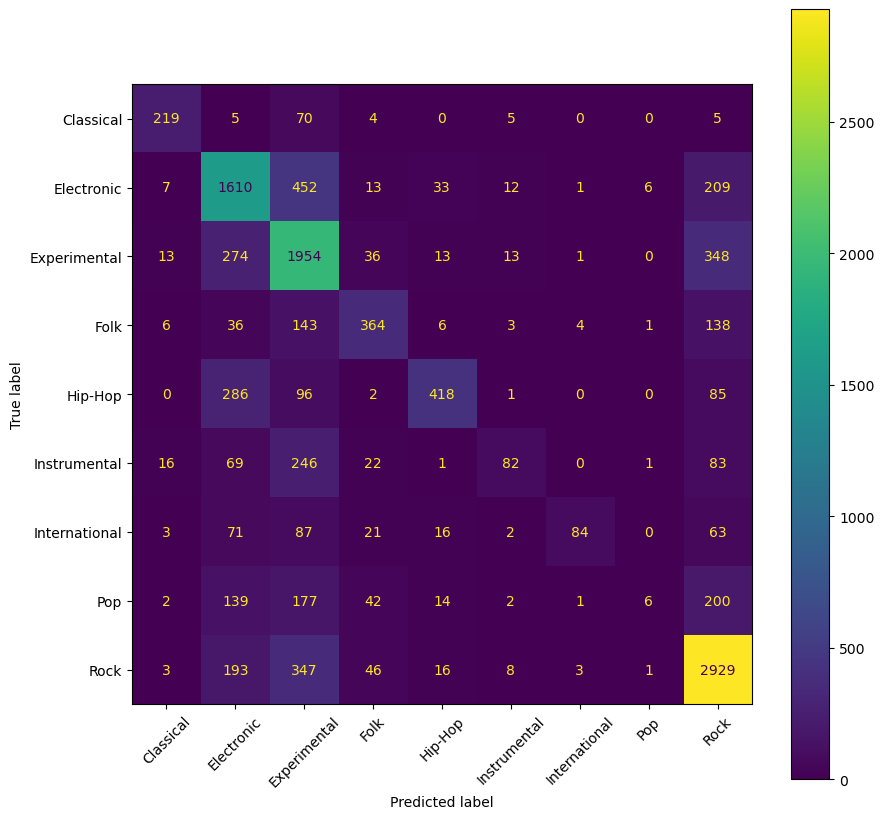

In [23]:
from sklearn.metrics import classification_report, confusion_matrix ,ConfusionMatrixDisplay

class_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(class_report)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_table['class_label'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax)
plt.xticks(rotation=45)

# show the plot
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# pipeline
pipeline = Pipeline([
    ('scaling', None),  
    ('model', RandomForestClassifier())  
])

# parameter grid 
param_grid = {
    'scaling': [None],
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 5, 10]
}

#cross-val
cv = KFold(n_splits=3, shuffle=True, random_state=42)

#Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, verbose=3)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# 
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)
score_rf = best_model.score(X_test, y_test)


In [ ]:
print(best_model_rf)
print(score_rf)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
class_report = classification_report(y_test,y_pred)
print(class_report)

In [ ]:
pipeline = Pipeline([
    ('scaling', None),
    ('model', LogisticRegression())
])

# Define the parameter grid to search over
param_grid = {
    'scaling': [MinMaxScaler(), StandardScaler()],
    'model__C': [0.001,0.01, 0.1, 1, 10,100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the cross-validation strategy
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, verbose=3)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Evaluate the best model on your test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = best_model.score(X_test, y_test)

In [ ]:
print(best_model)
print(score)

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

lr = LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
class_report = classification_report(y_test,y_pred)
print(class_report)

In [ ]:
from sklearn.svm import S

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

In [ ]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = y_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(report)